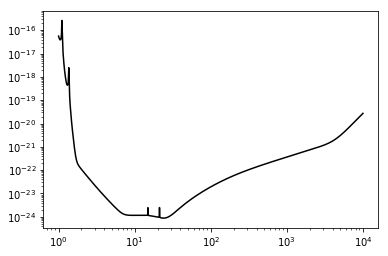

In [1]:
import numpy as np, matplotlib.pyplot as plt, scipy.integrate as INT
%matplotlib inline
Noise_ET=np.loadtxt('ET_D_data.txt')
freq=Noise_ET[:,0]
noise1=Noise_ET[:,1]
noise2=Noise_ET[:,2]
noise3=Noise_ET[:,3]
plt.yscale('log')
plt.xscale('log')
plt.plot(freq,noise1,'k-')#,freq,noise2,'r-',freq,noise3,'b-')

In [2]:
def Sn(f):
    return np.interp(f,freq,noise1**2)

In [3]:
import scipy as sci

In [4]:
######## A table#################
y101=0.6437
y102=0.1469
y103=-0.4098
y104=-0.1331
###############################################
y111=0.827
y112=-0.1228
y113=-0.03523
y114=-0.08172
###############################################
y121=-0.2706
y122=-0.02609
y123=0.1008
y124=0.1451
###############################################
y201=-0.05822
y202=-0.0249
y203=1.829
y204=-0.2714
###############################################
y211=-3.935
y212=0.1701
y213=-0.02017
y214=0.1279
###############################################
y301=-7.092
y302=2.325
y303=-2.87
y304=4.922

x102=-920.9
x112=492.1
x122=135
x202=6742
x212=-1053
x302=-1.34e4
###########################
x103=1.702e4
x113=-9566
x123=-2182
x203=-1.214e5
x213=2.075e4
x303=2.386e5
###########################
x104=-1.254e5
x114=7.507e4
x124=1.338e4
x204=8.735e5
x214=-1.657e5
x304=-1.694e6
###########################
x105=0
x115=0
x125=0
x205=0
x215=0
x305=0
###########################
x106=-8.898e5
x116=6.31e5
x126=5.068e4
x206=5.981e6
x216=-1.415e6
x306=-1.128e7
###########################
x107=8.696e5
x117=-6.71e5
x127=-3.008e4
x207=-5.838e6
x217=1.514e6
x307=1.089e7

In [34]:
def F1(theta,phi,psi):
    plus=-0.433*((1.0+np.cos(theta)**2)*np.sin(2.0*phi)*np.cos(2.0*psi)+2.0*np.cos(theta)*np.cos(2.0*phi)*np.sin(2.0*psi))
    cross=0.433*((1.0+np.cos(theta)**2)*np.sin(2.0*phi)*np.sin(2.0*psi)-2.0*np.cos(theta)*np.cos(2.0*phi)*np.cos(2.0*psi))
    return [plus,cross]
# Mi is the mass of individual BH, in solar masses. chi_i is the reduced spin of BH.
GMsun=1.32754125e26 # cgs unit
DKPC=3.086e+21 # cgs unit
c=3e10 #cgs
def C(M1,M2,D,i,theta,phi,psi):
    M=M1+M2
    factor=M*15.4787466e-6 #second;
    eta=M1*M2/M**2
    result=(GMsun*M)**0.83333/(2.0*D*DKPC*2.1433*c**1.5)*\
    (0.208333*eta)**0.5*np.sqrt((1.0+np.cos(i)**2)**2*F1(theta,phi,psi)[0]**2+\
                                4.0*np.cos(i)**2*F1(theta,phi,psi)[1]**2)   
    return result
Lorentz = lambda x1,x2,x3: 1.0/3.14159*0.5*x3/((x1-x2)**2+(0.5*x3)**2)
def gamma(f,M1,M2,chi1,chi2): # the input value is with unit Hz
    
    M=M1+M2;
    eta=M1*M2/M**2;
    factor=M*15.4787466e-6 #second;
    ft=f*factor # convert the input frequency to a dimensionless one
    delta=(M1-M2)/M; # delta is independent with the total mass
    chi=(1+delta)*chi1*0.5+(1-delta)*chi2*0.5 #spin
    ###############################################
    mu01=1-4.455*(1-chi)**0.217+3.521*(1-chi)**0.26 # independent of the total mass
    mu02=(1-0.63*(1-chi)**0.3)*0.5
    mu03=(1-0.63*(1-chi)**0.3)*(1-chi)**0.45*0.25
    mu04=0.3236+0.04894*chi+0.01346*chi**2
    ###############################################
    f0=np.pi*1e-3
    f1=mu01+y101*eta+y111*eta*chi+y121*eta*chi**2+y201*eta**2+y211*eta**2*chi+y301*eta**3; 
    f2=mu02+y102*eta+y112*eta*chi+y122*eta*chi**2+y202*eta**2+y212*eta**2*chi+y302*eta**3;
    sigma=mu03+y103*eta+y113*eta*chi+y123*eta*chi**2+y203*eta**2+y213*eta**2*chi+y303*eta**3;
    f3=mu04+y104*eta+y114*eta*chi+y124*eta*chi**2+y204*eta**2+y214*eta**2*chi+y304*eta**3;  #these are indepened with the total mass
    ###############################################
    alpha2=-323.0/224+451.0*eta/168.0
    alpha3=(27.0/8-11.0*eta/6.0)*chi
    epsilon1=1.4547*chi-1.8897
    epsilon2=-1.8153*chi-1.6557
    ################################################    
    fp=ft/f1;
    v=ft**0.3333    
    Wm=(1+alpha2*v**2+alpha3*v**3)/(1+epsilon1*v+epsilon2*v**2)
    Wr=Wm*(f2/f1)**(-2.0/3)*(1+epsilon1*v+epsilon2*v**2)/Lorentz(f2,f2,sigma)
    if (ft<f1) and (ft>f0):
        result=ft**(-7.0/6)*(1+alpha2*v**2+alpha3*v**3);
    elif (ft>=f1) and (ft<f2):
        result=Wm*f1**(-7.0/6)*fp**(-2.0/3)*(1+epsilon1*v+epsilon2*v**2);
    elif ft>=f2 and ft<f3:
        result=Wr*f1**(-7.0/6)*Lorentz(ft,f2,sigma)
    else: 
        result=0
    return [result,f1/factor,f2/factor,f3/factor]

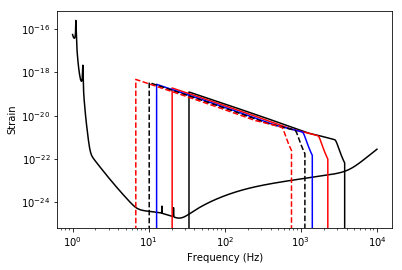

In [14]:
# MM=[3.,5.,8.,10.,15.,20.,]
# LS=['k-','r-','b-','k--','r--','b--']
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Strain')
# plt.plot(freq,noise1/np.sqrt(freq),'k-')
# #plt.ylim([1e-12,1e-10])
# for i in range(0,5):
#     Signal=[C(MM[i],MM[i],1e6,0.,0.,0.,0.)*gamma(f,MM[i],MM[i],0.,0.)[0] for f in freq]
#     plt.plot(freq,Signal,LS[i])

In [29]:
M0=1.5
chi0=0
D0=1e3 # in order of Kpc
factor=2.0*M0*15.4787466e-6 #second;
def INT(y): 
        fp=np.exp(y)
        result=fp*gamma(fp/factor,M0,M0,chi0,chi0)[0]**2/Sn(fp/factor)
        return result*1e-48
f0=np.pi*1e-3
delta=(M0-M0)/(2.0*M0); # delta is independent with the total mass
chi=chi0
eta=0.25
###############################################
mu01=1-4.455*(1-chi)**0.217+3.521*(1-chi)**0.26 # independent of the total mass
mu02=(1-0.63*(1-chi)**0.3)*0.5
mu03=(1-0.63*(1-chi)**0.3)*(1-chi)**0.45*0.25
mu04=0.3236+0.04894*chi+0.01346*chi**2
###############################################
f0=np.pi*1e-3
#f1=mu01+y101*eta+y111*eta*chi+y121*eta*chi**2+y201*eta**2+y211*eta**2*chi+y301*eta**3; 
#f2=mu02+y102*eta+y112*eta*chi+y122*eta*chi**2+y202*eta**2+y212*eta**2*chi+y302*eta**3;
#sigma=mu03+y103*eta+y113*eta*chi+y123*eta*chi**2+y203*eta**2+y213*eta**2*chi+y303*eta**3;
f3=mu04+y104*eta+y114*eta*chi+y124*eta*chi**2+y204*eta**2+y214*eta**2*chi+y304*eta**3;  

In [33]:
ylow=np.log(f0)
yhigh=np.log(f3)
rhosq=sci.integrate.quad(INT,ylow,yhigh)
rhosq=4.0*C(M0,M0,D0,0,0,0,0)**2*rhosq[0]*1e48/factor
rho=np.sqrt(rhosq)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


In [35]:
# Y=np.linspace(-5.,-1.)
# IN=[INT(y) for y in Y]
# plt.plot(Y,IN)
C(M0,M0,D0,0,0,0,0)

8.441608910979059e-20

55360920.9381759


21534.904727578738


In [27]:
F1(0,0,0)

[-0.0, -0.866]